In [2]:
%pylab
%matplotlib inline
import numpy
from matplotlib import pyplot
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import otsu
import scipy.ndimage



Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [17]:
# histogram stretching algorithm
def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [18]:
def binarize(x, intensity):
    img = x.copy()

    img[img > 0] = intensity
    img[img <= 0] = 0
    #for o in np.ndindex(img.shape):
     #   if img[o] > 0: 
      #     img[o] = 1
       # else:
        #    img[o] = 0
    
    return img

In [19]:
img1 = imread(r"data\Otsu_data\NIH3T3\img\dna-1.png")
img=copy(img1)

In [20]:
#image for comparison of different preprocessing methods
#img = imread(r"data\Otsu_data\N2DH-GOWT1\img\t52.tif")

img_raw = otsu.otsu_thresholding(img1, 256)
img_median = otsu.otsu_thresholding(scipy.ndimage.median_filter(img1, 5), 256)
img_gauss = otsu.otsu_thresholding(scipy.ndimage.gaussian_filter(img1,5), 256)
img_stretch = otsu.otsu_thresholding(stretch(img1), 256)

In [21]:
def image_comparison_whole_image(list_of_images):
    imlist = list_of_images
    number_of_images=len(list_of_images)
    img0=list_of_images[0]
    x=int(img0.shape[0]/number_of_images)
    y=img.shape[1]
    i=1
    while i<number_of_images:
        image=list_of_images[i]
        img0[x*i:x*(i+1),0:y] = image[x*i:x*(i+1), 0:y]
        img0[x*i:x*i+3,0:y] = 1
        i+=1
    figure()
    imshow(img0, 'gray')
    return img0



In [28]:
def image_comparison_same_segment(list_of_images, x0, height, intensity):
    imlist = list_of_images
    number_of_images=len(list_of_images)
    img0=list_of_images[0]
    x=height
    y=img.shape[1]
    i=0
    while i<number_of_images:
        image=list_of_images[i]
        img0[x*i:x*(i+1),0:y] = image[x0:x0+x, 0:y]
        img0[x*i:x*i+3,0:y] = intensity
        i+=1
    from nuclei_segmentation import local_thresholding
    img0=img0[0:x*number_of_images, 0:y]
    figure()
    imshow(img0, 'gray')
    return img0

In [23]:
img1 = img
img2 = scipy.ndimage.gaussian_filter(img, 10)
img3 = stretch(img2)
img4 = otsu.otsu_thresholding(img3, 256)
list=[img1,img2,img4]

In [24]:
img=imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
from nuclei_segmentation import local_thresholding
sliding_window_on_img = local_thresholding.local_thresholding_mean_better(img, 50, 200)

KeyboardInterrupt: 

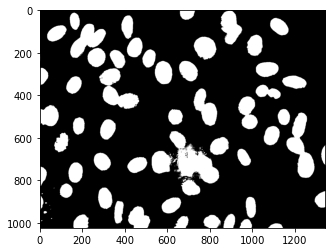

In [ ]:
imshow(sliding_window_on_img, 'gray')

In [25]:
from nuclei_segmentation import dicescore
gt_nih3t3_44 = imread(r"data\Otsu_data\NIH3T3\gt\44.png")
dicescore.dice(sliding_window_on_img, gt_nih3t3_44)

0.855324710549572

In [26]:
from nuclei_segmentation import local_thresholding
from nuclei_segmentation import two_level_otsu

img=imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
#image=stretch(img)
gt_img = binarize((imread(r"data\Otsu_data\NIH3T3\gt\44.png")))
otsu_img = otsu.otsu_thresholding(img, 256)
print('done')
tl_img = two_level_otsu.two_level_otsu_thresholding_clip(img,256)
print('done2')
lt_img= binarize(local_thresholding.local_thresholding_mean(img, 50, 200), intensity)
print('done3')

list=[img,otsu_img,tl_img,lt_img, gt_img]
image_comparison_same_segment(list, 0, 200, intensity)

TypeError: binarize() missing 1 required positional argument: 'intensity'

done
done2
done3


array([[94, 94, 94, ..., 94, 94, 94],
       [94, 94, 94, ..., 94, 94, 94],
       [94, 94, 94, ..., 94, 94, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

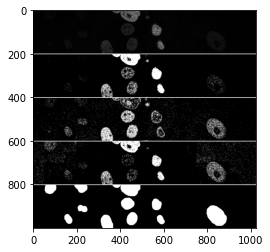

In [29]:

img=imread(r"data\Otsu_data\N2DH-GOWT1\img\t52.tif")
intensity=max(unique(img))
#image=stretch(img)
gt_img = binarize(imread(r"data\Otsu_data\N2DH-GOWT1\gt\man_seg52.tif"), intensity)
otsu_img = binarize(otsu.otsu_thresholding(img, 256), intensity)
print('done')
tl_img = binarize(two_level_otsu.two_level_otsu_thresholding_clip(img,256), intensity)
print('done2')
lt_img= binarize(local_thresholding.local_thresholding_mean(img, 50, 200), intensity)
print('done3')

list=[img, otsu_img,tl_img,lt_img, gt_img]
image_comparison_same_segment(list, 100, 200, intensity)

In [30]:
img=imread(r"data\Otsu_data\N2DL-HeLa\img\t75.tif")
intensity=max(unique(img))
gt_img = binarize(imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg75.tif"), intensity)
otsu_img = otsu.otsu_thresholding(img, 256)
print('done')
tl_img = binarize(two_level_otsu.two_level_otsu_thresholding_clip(img,256),intensity)
print('done2')
lt_img= binarize(local_thresholding.local_thresholding_mean(img, 50, 200),intensity)
print('done3')

list=[otsu_img,tl_img,lt_img, gt_img]
image_comparison_same_segment(list, 100, 200, intensity)

done
done2


c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:96: RuntimeWarning: invalid value encountered in longlong_scalars
  w0 = w0_sum / sum(n)
c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:104: RuntimeWarning: invalid value encountered in double_scalars
  v0 = v0_sum / sum(n[0:i+1])
c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:111: RuntimeWarning: invalid value encountered in longlong_scalars
  w1 = w1_sum / sum(n)


done3


ValueError: could not broadcast input array from shape (200,1100) into shape (100,1100)

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


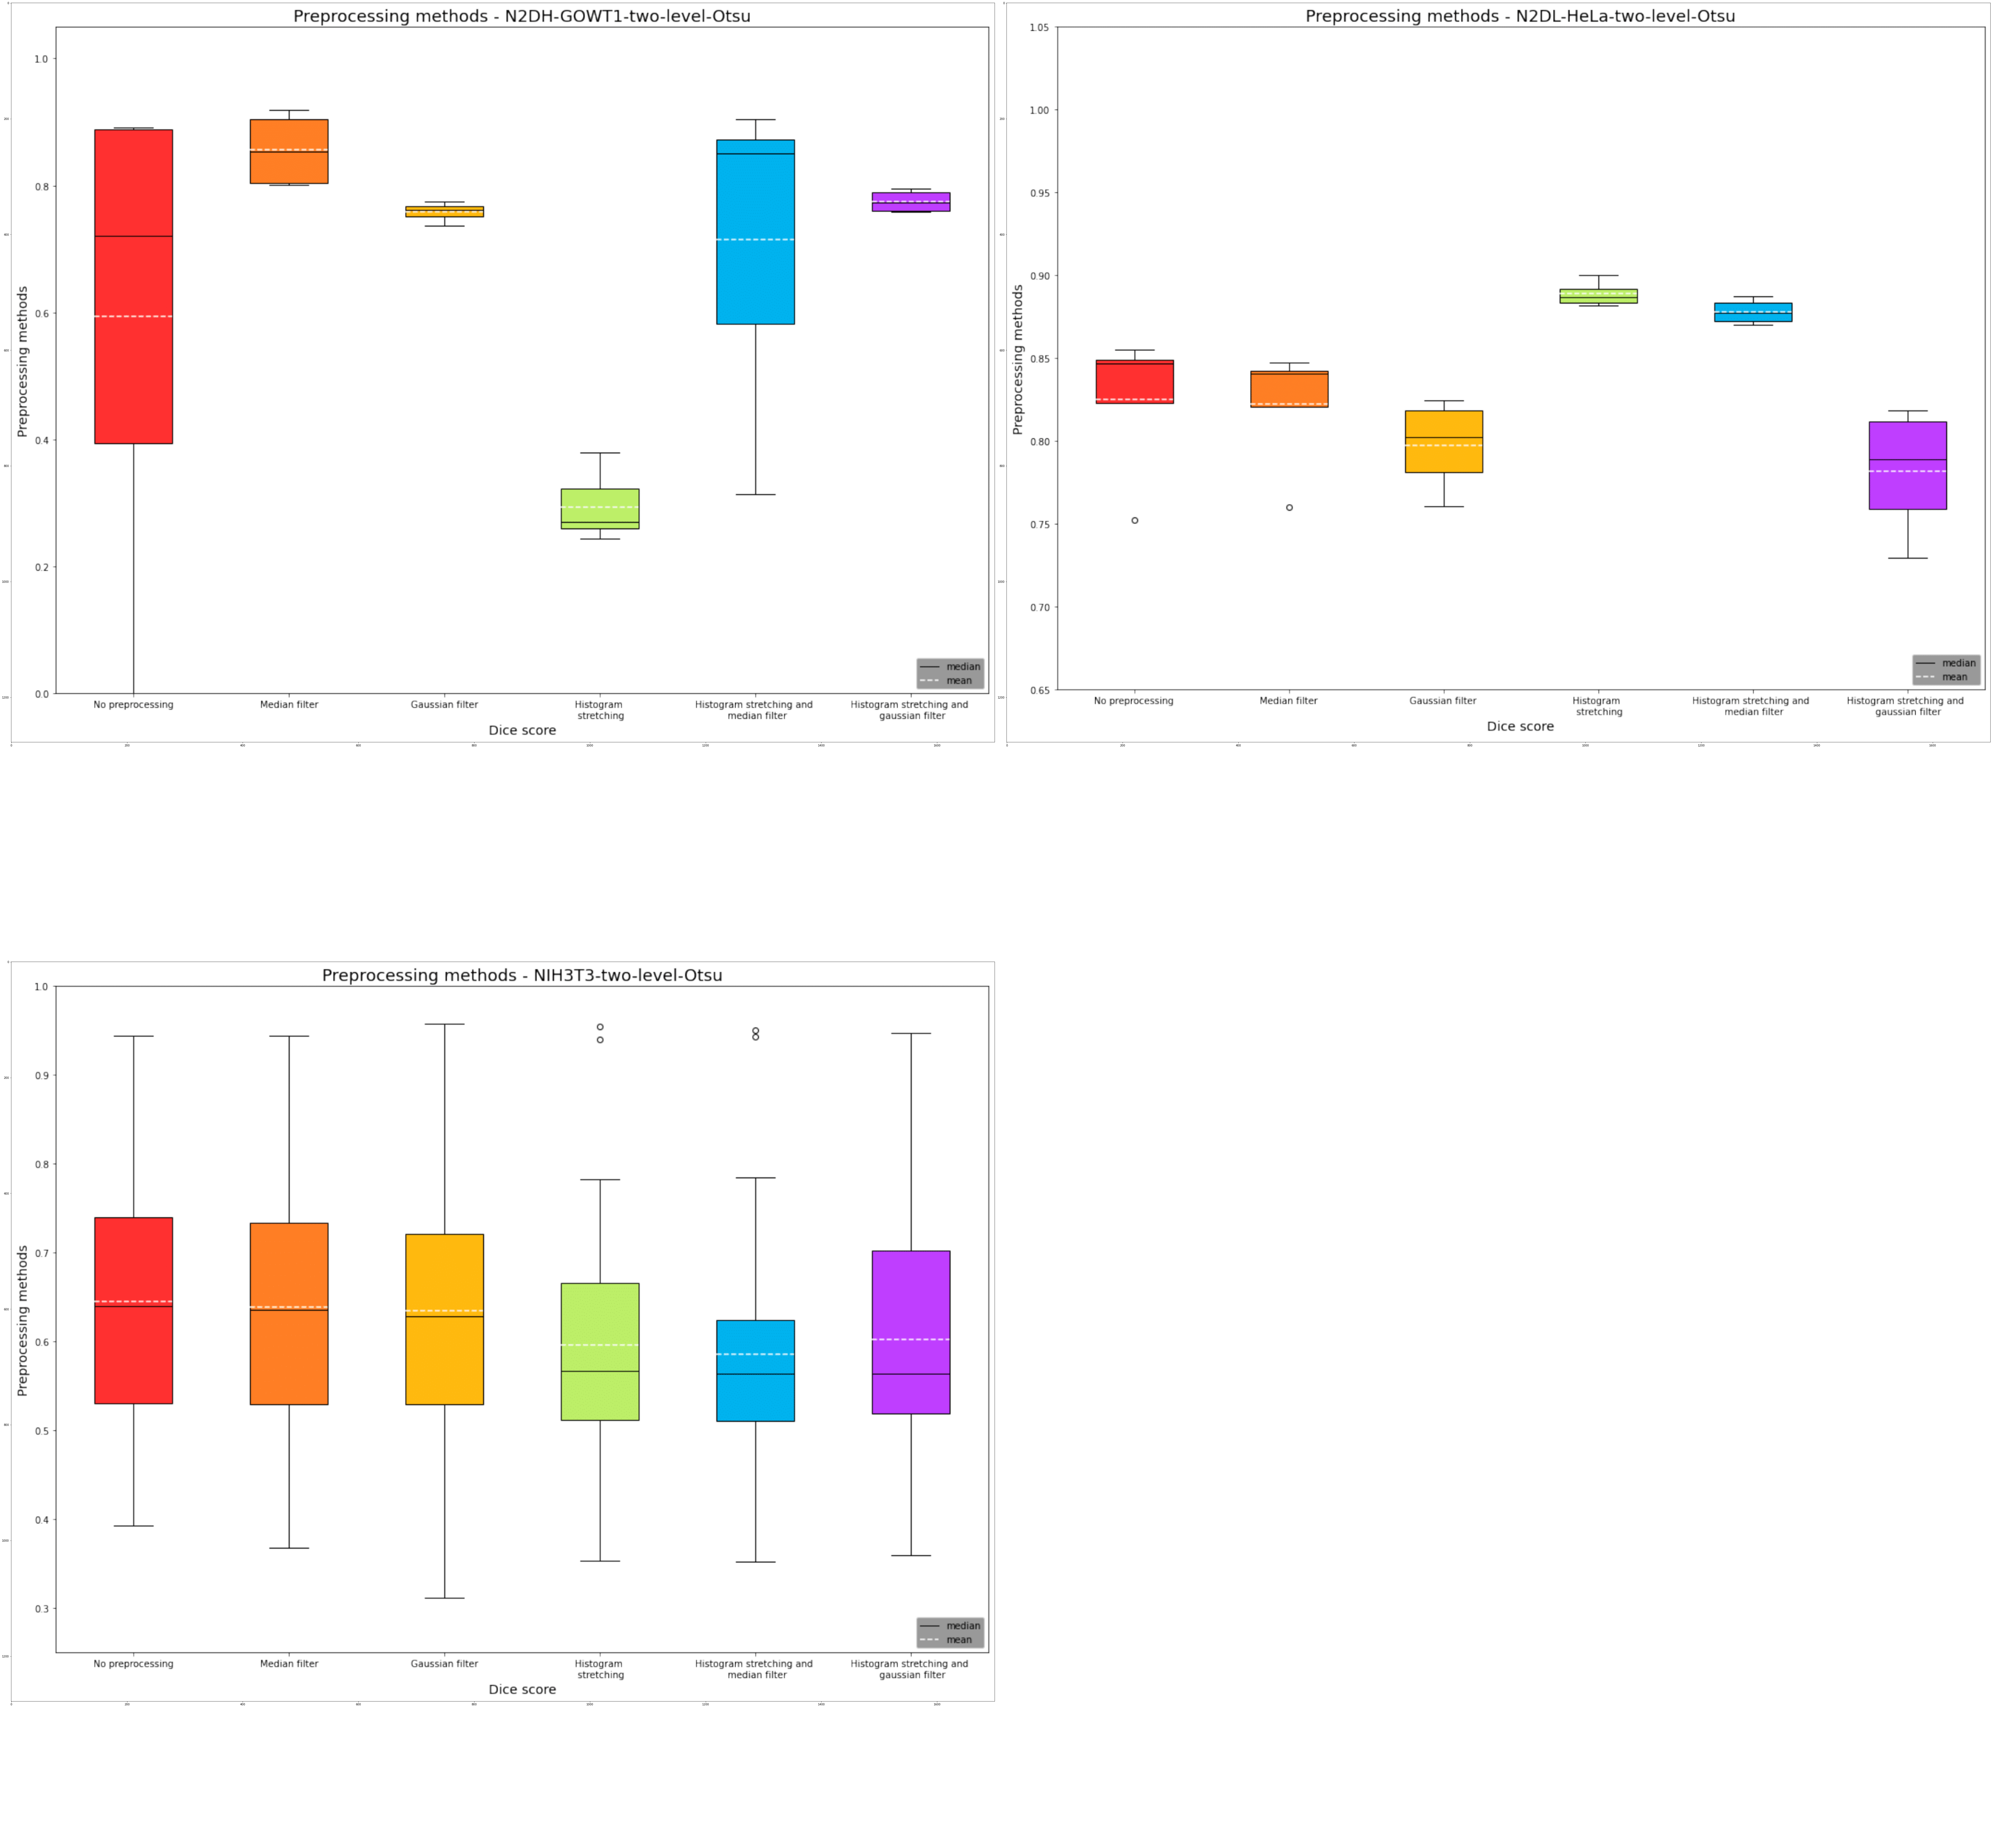

In [25]:
%pylab
%matplotlib inline
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
import matplotlib as plt
from nuclei_segmentation import preprocessing as pp

image1 = imread(r'Outputs_Boxplots/Output_TwoLevel_N2DH-GOWT1_ohneholefilling bei histogram stretching.png')
image2 = imread(r'Outputs_Boxplots/Output_TwoLevel_HeLa.png')
image3 = imread(r'Outputs_Boxplots/Output_TwoLevel_NIH3T3.png')

pp.subplot(image1,image2,image3)

In [62]:
img1img = imread(r'Outputs_Boxplots/no_preprocessing_N2DH-GOWT1_t31.png')
img2img = imread(r'Outputs_Boxplots/no_preprocessing_N2DL-HeLa_t75.png')
img3img = imread(r'Outputs_Boxplots/no_preprocessing_NIH3T3_dna44.png')
img4img = imread(r'Outputs_Boxplots/no_preprocessing_NIH3T3_dna32.png')
img1gt = imread(r'Outputs_Boxplots/gt_N2DH-GOWT1_t31.png')
img2gt = imread(r'Outputs_Boxplots/gt_N2DL-HeLa_t75.png')
img3gt = imread(r'Outputs_Boxplots/gt_NIH3T3_dna44.png')
img4gt = imread(r'Outputs_Boxplots/gt_NIH3T3_dna32.png')
img1loc = imread(r'Outputs_Boxplots/Local_Two-level_Otsu_thresholding_average_N2DH-GOWT1_t31.png')
img2loc = imread(r'Outputs_Boxplots/Local_Two-level_Otsu_thresholding_average_N2DL-HeLa_t75.png')
img3loc = imread(r'Outputs_Boxplots/Local_Two-level_Otsu_thresholding_average_NIH3T3_dna44.png')
img4loc = imread(r'Outputs_Boxplots/Local_Two-level_Otsu_thresholding_clip_average_NIH3T3_dna32.png')
img5loc = imread(r'Outputs_Boxplots/Local_Two-level_Otsu_thresholding_clip_average_N2DH-GOWT1_t31.png')
img6loc = imread(r'Outputs_Boxplots/Local_Two-level_Otsu_thresholding_clip_average_N2DL-HeLa_t75.png')


(-0.5, 1023.5, 1023.5, -0.5)

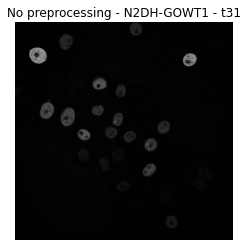

In [57]:
figure()
imshow(img1img , 'gray')
plt.title('No preprocessing - N2DH-GOWT1 - t31')
plt.axis('off')

(-0.5, 1099.5, 699.5, -0.5)

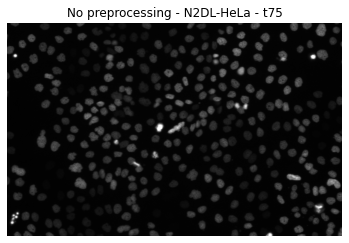

In [58]:
figure()
imshow(img2img , 'gray')
plt.title('No preprocessing - N2DL-HeLa - t75')
plt.axis('off')

(-0.5, 1343.5, 1023.5, -0.5)

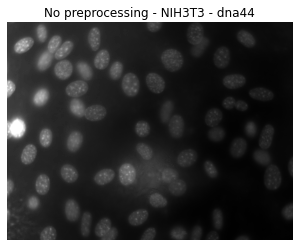

In [59]:
figure()
imshow(img3img , 'gray')
plt.title('No preprocessing - NIH3T3 - dna44')
plt.axis('off')

(-0.5, 1343.5, 1023.5, -0.5)

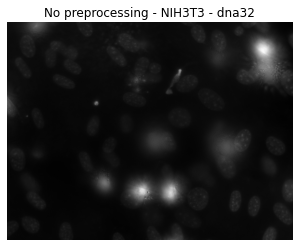

In [60]:
figure()
imshow(img4img , 'gray')
plt.title('No preprocessing - NIH3T3 - dna32')
plt.axis('off')

(-0.5, 271.5, 251.5, -0.5)

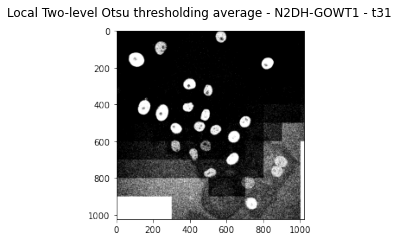

In [15]:
figure()
imshow(img1loc)
plt.title('Local Two-level Otsu thresholding average - N2DH-GOWT1 - t31')
plt.axis('off')

(-0.5, 374.5, 247.5, -0.5)

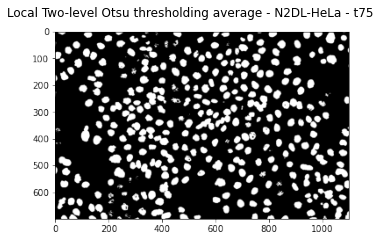

In [21]:
figure()
imshow(img2loc)
plt.title('Local Two-level Otsu thresholding average - N2DL-HeLa - t75')
plt.axis('off')

(-0.5, 331.5, 251.5, -0.5)

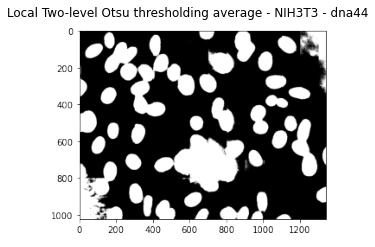

In [22]:
figure()
imshow(img3loc)
plt.title('Local Two-level Otsu thresholding average - NIH3T3 - dna44')
plt.axis('off')

(-0.5, 331.5, 251.5, -0.5)

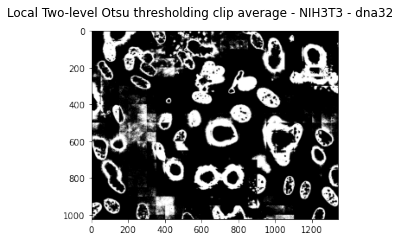

In [29]:
figure()
imshow(img4loc)
plt.title('Local Two-level Otsu thresholding clip average - NIH3T3 - dna32')
plt.axis('off')

(-0.5, 271.5, 251.5, -0.5)

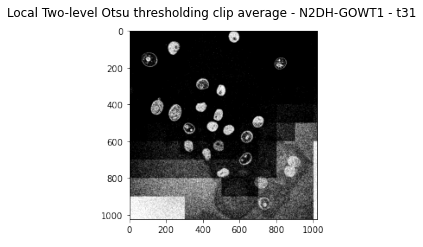

In [38]:
figure()
imshow(img5loc)
plt.title('Local Two-level Otsu thresholding clip average - N2DH-GOWT1 - t31')
plt.axis('off')

(-0.5, 374.5, 247.5, -0.5)

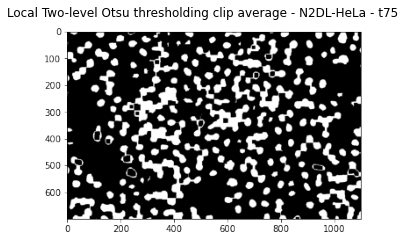

In [39]:
figure()
imshow(img6loc)
plt.title('Local Two-level Otsu thresholding clip average - N2DL-HeLa - t75')
plt.axis('off')

In [45]:
def binarize(x):
    """
    This function takes an image with intensity values between 0 and 1 and binarizes them. It is used to binarize
    our given ground truth images. 

    :param x: Input image
    :return: binarized image
    
    """
    img = x.copy()

    img[img > 0] = 1
    img[img <= 0] = 0
    
    
    return img

In [48]:
img1gt1 = binarize(img1gt)
img1gt2 = binarize(img2gt)
img1gt3 = binarize(img3gt)
img1gt4 = binarize(img4gt)


(-0.5, 1023.5, 1023.5, -0.5)

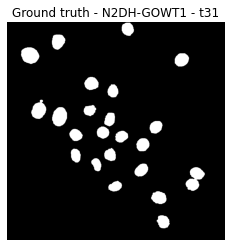

In [47]:
figure()
imshow(img1gt1 , 'gray')
plt.title('Ground truth - N2DH-GOWT1 - t31')
plt.axis('off')

(-0.5, 1099.5, 699.5, -0.5)

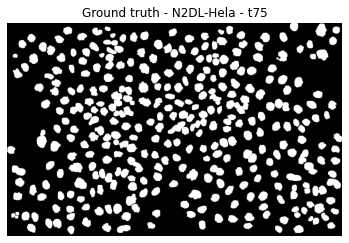

In [49]:
figure()
imshow(img1gt2 , 'gray')
plt.title('Ground truth - N2DL-Hela - t75')
plt.axis('off')

(-0.5, 1343.5, 1023.5, -0.5)

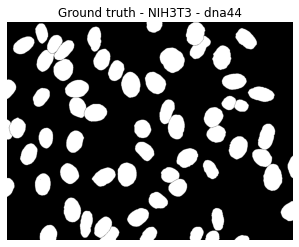

In [50]:
figure()
imshow(img1gt3 , 'gray')
plt.title('Ground truth - NIH3T3 - dna44')
plt.axis('off')

(-0.5, 1343.5, 1023.5, -0.5)

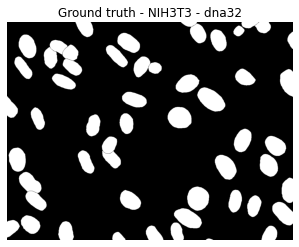

In [51]:
figure()
imshow(img1gt4 , 'gray')
plt.title('Ground truth - NIH3T3 - dna32')
plt.axis('off')